# Лабораторная работа 1
## Анализ погрешностей методов численного дифференцирования 
Выполнил: Шумаков Иван Б01-009

Анализ выполнялся на 5 функциях:
1. $\sin(x^2)$
2. $\cos(\sin(x))$
3. $e^{\sin(\cos(x))}$
4. $\ln(x+3)$
5. $\sqrt{x+3}$

В точке $x = 2.672$ 

Для поиска численной производной использовалтсь методы:
1. ${f(x + h) - f(x)} \over {h}$
2. ${f(x) - f(x - h)} \over {h}$
3. ${f(x + h) - f(x - h)} \over {2h}$
4. $ {4 \over 3} {{f(x + h) - f(x - h)} \over {2h}} - {1 \over 3} {{f(x + 2h) - f(x - 2h)} \over {4h}}$
5. $ {3 \over 2} {{f(x + h) - f(x - h)} \over {2h}} - {3 \over 5} {{f(x + 2h) - f(x - 2h)} \over {4h}} + {1 \over 10} {{f(x + 3h) - f(x - 3h)} \over {6h}}$

Поскольку графики погрешностей будут строиться в логарифмическом масштабе, у каждого графика будет участок с линейной зависимостью с углом наклона $\alpha$ таким, что $\tg{\alpha} \sim k$, где $k$ - порядок метода.

Первые два метода имеют первый порядок, следовательно графики их ошибок должны почти совпадать. 

Третий метод имеет второй порядок, следовательно наклон линейного участка должен быть в 2 раза круче, чем в первых двух случаях.

Четвертый и пятый методы соответсвкенно имеют 3 и 4 порядок.

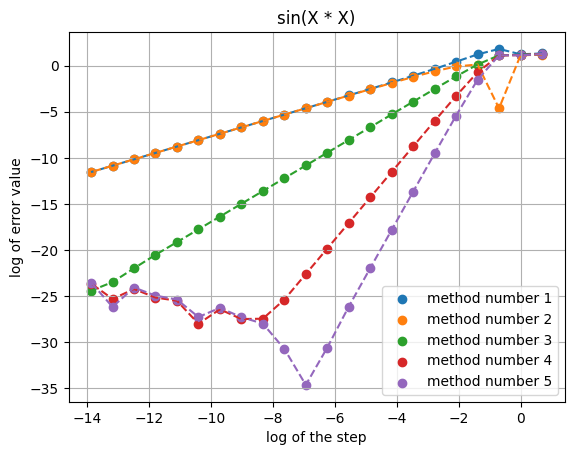

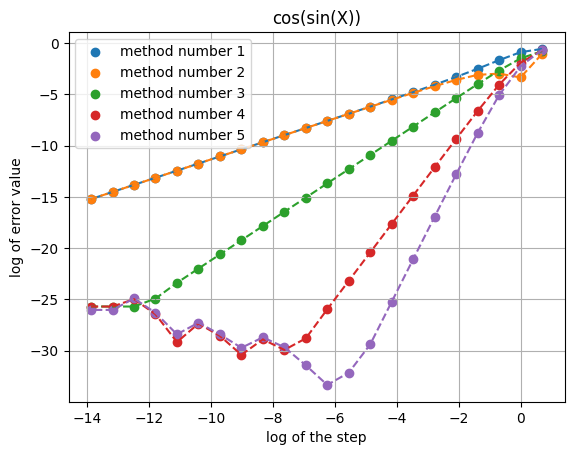

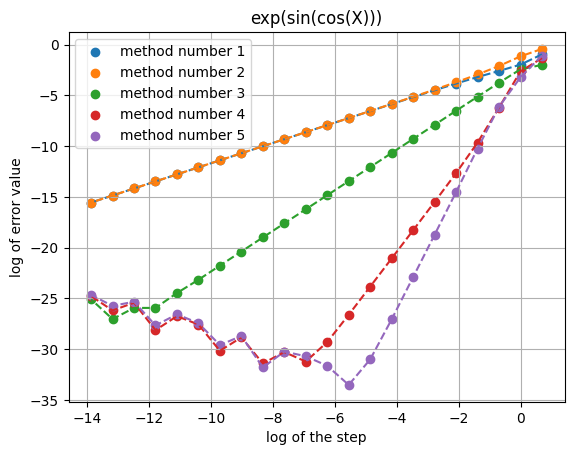

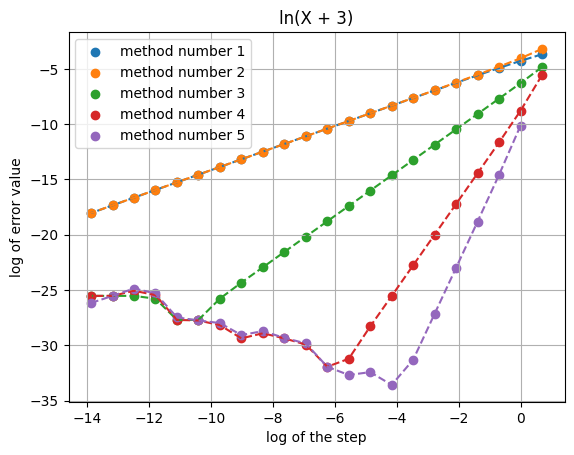

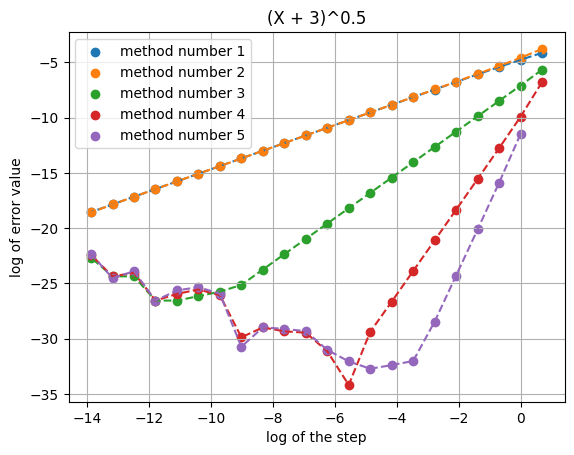

In [4]:
# %load 'Compute.py'
from Plot import MyPlot
from Plot import PlotFunction 

import numpy as np             
import matplotlib.pyplot as plt

#matplotlib ругается на тип, передаваемый в легенду
import warnings
warnings.filterwarnings("ignore")

point_for_analysis = 2.672

class FunctionError:   

    num_of_methods = 5

    def __init_steps():
        arr_size = 22
        array = np.full(arr_size, 2.0)
        for i in range(arr_size):
            array[i] = array[i] / np.power(array[i], i)
        return array

    def __add_errors(self, new_errors):
        if self.__errors.size == 0:
            self.__errors = new_errors
        else:
            self.__errors = np.vstack((self.__errors, new_errors))

    def __create_log_graph(arrayX, arrayY):
        my_graph = PlotFunction()
        my_graph.set_arrayX(arrayX)
        my_graph.set_arrayY(arrayY)
        my_graph.transformX(np.log)
        my_graph.transformY(np.log)
        return my_graph

    def __init__(self, func, derivative, func_name):
        self.__plot = MyPlot()
        self.__plot.config_plot(func_name, 'log of the step', 'log of error value')
        self.__func = func                                                              #function to be analyzed 
        self.__derivative = derivative                                                  #derivative of function                          
        self.__steps = FunctionError.__init_steps()                                     #h steps 
        self.__errors = np.array([], [])

    #Returns array of errors depending on approx derivative method
    def calc_error(self, derivative_method):
        result_array = np.array([])
        func = self.__func
        deriv = self.__derivative
        for cur_step in self.__steps:
            approx_deriv = derivative_method(func, point_for_analysis, cur_step)
            exact_deriv = deriv(point_for_analysis)
            result_array = np.append(result_array, np.abs(exact_deriv - approx_deriv))
        self.__add_errors(result_array)
        return result_array

    #Adds functions to plot
    def draw_graph(self):
        method_num = 1
        for cur_method_error in self.__errors:
            graph_function = FunctionError.__create_log_graph(self.__steps, cur_method_error)
            self.__plot.add_dots(graph_function)
            graph_function.set_legend('method number ' + str(method_num))
            self.__plot.add_function(graph_function)
            method_num += 1
        self.__plot.draw_all()

    def first_order_method(func, X, step):
        return (func(X + step) - func(X)) / step
    
    def second_order_method(func, X, step):
        return (func(X) - func(X - step)) / step

    def third_order_method(func, X, step):
        return (func(X + step) - func(X - step)) / (2 * step)

    def fourth_order_method(func, X, step):
        return 4 / 3 * (func(X + step) - func(X - step)) / (2 * step) \
            - 1 / 3 * (func(X + 2 * step) - func(X - 2 * step)) / (4 * step)

    def fifth_order_method(func, X, step):
        return 3 / 2 * (func(X + step) - func(X - step)) / (2 * step) \
            - 3 / 5 * (func(X + 2 * step) - func(X - 2 * step)) / (4 * step) \
            + 1 / 10 * (func(X + 3 * step) - func(X - 3 * step)) / (6 * step)


def sin_X_square(X):
    return np.sin(X * X)

def deriv_sin_X_square(X):
    return 2 * X * np.cos(X * X)

def cos_sin_X(X):
    return np.cos(np.sin(X))

def deriv_cos_sin_X(X):
    return -1 * np.sin(np.sin(X)) * np.cos(X)

def exp_sin_cos_X(X):
    return np.exp(np.sin(np.cos(X)))

def deriv_exp_sin_cos_X(X):
    return -1 * exp_sin_cos_X(X) * np.cos(np.cos(X)) * np.sin(X) 

def ln_X_plus_3(X):
    return np.log(X + 3)

def deriv_ln_X_plus_3(X):
    return 1 / (X + 3)

def root_X_plus_3(X):
    return np.power(X + 3, 0.5)

def deriv_root_X_plus_3(X):
    return 1 / (2 * root_X_plus_3(X)) 

def main():
    functions_list = [sin_X_square, cos_sin_X, exp_sin_cos_X, ln_X_plus_3, root_X_plus_3]
    derivatives_list = [deriv_sin_X_square, deriv_cos_sin_X, deriv_exp_sin_cos_X, deriv_ln_X_plus_3, deriv_root_X_plus_3]
    func_names_list = ['sin(X * X)', 'cos(sin(X))', 'exp(sin(cos(X)))', 'ln(X + 3)', '(X + 3)^0.5']
    methods_list = [FunctionError.first_order_method,  \
                    FunctionError.second_order_method, \
                    FunctionError.third_order_method,  \
                    FunctionError.fourth_order_method, \
                    FunctionError.fifth_order_method ]

    if len(functions_list) != len(func_names_list):
        print('Error: differnt sizes')

    for i in range(len(functions_list)):
        cur_func_err = FunctionError(functions_list[i], derivatives_list[i], func_names_list[i])
        for cur_method in methods_list:
            cur_func_err.calc_error(cur_method)
        cur_func_err.draw_graph()

    MyPlot.show_all()

if __name__ == '__main__':
    main()

По результатам моделирования графики совпалают с теориетическими. Небольшие отклонения между разными функциями связаны с различным поведением их производных в исследуемой точке.

Для методов высшего порядка наблюдается минимум и отклонение от линейной зависимости. Это связано с тем, что при некотором значении $h$ точность метода нивелируется погрешностью представления целых чисел. 